In [1]:
%config Completer.use_jedi = False
%matplotlib notebook
import astropy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.table import Table
from astropy.io import fits
from glob import glob
import os
from tqdm import tqdm_notebook, tnrange, tqdm
#import pandas as pd
from astropy.wcs import WCS
import sys
from spectral_cube import SpectralCube
import fs
import fs.copy
import socket
import warnings

In [3]:
sbid = 8585
field = 'RACS_test4_1.05_1049-31A'

# Check host and get file locations
host = socket.gethostname()

print('Host is',host)

if host == 'motley':
    rootdir= '/data/motley/athomson/cubes'
    warnings.warn("Data is on remote disk. Read/Write will be slow.")
    
if host[:4] == 'mash':
    rootdir= '/home/athomson/gasalec/RACS_test'
    warnings.warn("Data is on remote disk. Read/Write will be slow.")
    
if host[:6] == 'galaxy' or host[:4] == 'zeus':
    rootdir = '/group/askap/mcc381/RACS'
    warnings.warn("Data is on remote disk. Read/Write will be slow.")

if host[:6] == 'avatar':
    rootdir = '/avatar/athomson/cubes'
    
# Glob out the necessary files
cubes = glob(f'{rootdir}/{sbid}/{field}/image.restored.*contcube*linmos*fits') # Data cubes

mus = glob(f'{rootdir}/{sbid}/{field}/*mu*fits') #
sigmas = glob(f'{rootdir}/{sbid}/{field}/*sigma*fits')
cubes

Host is avatar37


['/avatar/athomson/cubes/8585/RACS_test4_1.05_1049-31A/image.restored.i.SB8583.contcube.RACS_test4_1.05_1049-31A.linmos.fits',
 '/avatar/athomson/cubes/8585/RACS_test4_1.05_1049-31A/image.restored.q.SB8583.contcube.RACS_test4_1.05_1049-31A.linmos.fits',
 '/avatar/athomson/cubes/8585/RACS_test4_1.05_1049-31A/image.restored.u.SB8583.contcube.RACS_test4_1.05_1049-31A.linmos.fits',
 '/avatar/athomson/cubes/8585/RACS_test4_1.05_1049-31A/image.restored.p.SB8583.contcube.RACS_test4_1.05_1049-31A.linmos.fits']

In [4]:
ifile, ufile, qfile, pfile = cubes

In [4]:
ifile.replace('.i.','.p.')

'/home/athomson/gasalec/RACS_test/image.restored.p.SB8583.contcube.RACS_test4_1.05_1049-31A.linmos.fits'

In [12]:
with fits.open(ufile, mode = 'denywrite', memmap=True) as ulist:
    uhdu = ulist[0]
    with fits.open(qfile, mode = 'denywrite', memmap=True) as qlist:
        qhdu = qlist[0]

        #pdata = 
        fits.writeto(ifile.replace('.i.','.p.'), (uhdu.data**2 + qhdu.data**2)**0.5, qhdu.header)

MemoryError: Unable to allocate array with shape (288, 1, 8720, 8719) and data type float32

In [10]:
uhdu.size

87586191360

<IPython.core.display.Javascript object>


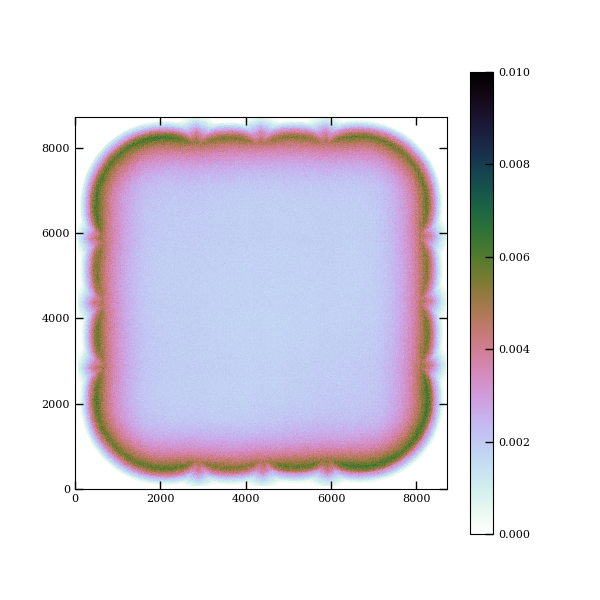

In [18]:
with fits.open(mus[0], mode = 'denywrite') as hdulist:
    hdu = hdulist[0]
    plt.figure()
    plt.imshow(hdu.data, cmap=plt.cm.cubehelix_r, origin='lower')
    plt.colorbar()
    plt.clim(0,0.01)

In [8]:
def mu(arr):
    '''
    \mu moment - freq axis first
    '''
    n = arr.shape[0]
    mu = np.nansum(arr, axis=0)/n
    return mu

def sigma(arr, mu):
    n = arr.shape[0]
    sigma = np.sqrt((1/(n-1)) * np.nansum( (arr - mu)**2 , axis=0))
    return sigma

def psi(arr, mu):
    n = arr.shape[0]
    num = (1/n) * np.nansum( (arr - mu)**3 , axis=0)
    dem = ((1/(n-1)) * np.nansum( (arr - mu)**2 , axis=0))**(3/2)
    psi = num/dem
    return psi

def kappa(arr, mu):
    n = arr.shape[0]
    num = (1/n) * np.nansum( (arr - mu)**4, axis=0 )
    dem = ((1/(n-1)) * np.nansum( (arr - mu)**2, axis=0 ))**2
    kappa = num/dem - 3
    return kappa


In [10]:
with fits.open(pfile, mode = 'denywrite', memmap=True) as plist:
    mu_p = mu(plist[0].data)
    outfile = pfile.replace('contcube','mu')
    try:
        fits.writeto(outfile, mu_p, header=plist[0].header)
    except:
        print('File exists')
    
    sigma_p = sigma(plist[0].data, mu_p)
    outfile = pfile.replace('contcube','sigma')
    try:
        fits.writeto(outfile, sigma_p, header=plist[0].header)
    except:
        print('File exists')

File exists


In [ ]:
fits.writeto(ifile.replace('.i.','.p.'), (uhdu.data**2 + qhdu.data**2)**0.5, qhdu.header)